In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Features
    
    Country or region: Name of the country
    Score: Overall happiness score (target)
    GDP per capita: Economic output per person
    Social support: Strength of social relationships
    Healthy life expectancy: Expected healthy years of life
    Freedom to make life choices: Perceived freedom
    Generosity: Willingness to give to others
    Perceptions of corruption: How much corruption is perceived in government

In [2]:
df = pd.read_csv('2019.csv')

In [3]:
df.shape

(156, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Plot Score for the top 10 countries ranked by Score to visualize the happiest nations.

In [30]:
top10_countries = df[['Country or region', 'Score']].sort_values(by='Score', ascending=False).head(10)
top10_countries

,Country or region,Score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
5,Switzerland,7.480
6,Sweden,7.343
7,New Zealand,7.307
8,Canada,7.278
9,Austria,7.246


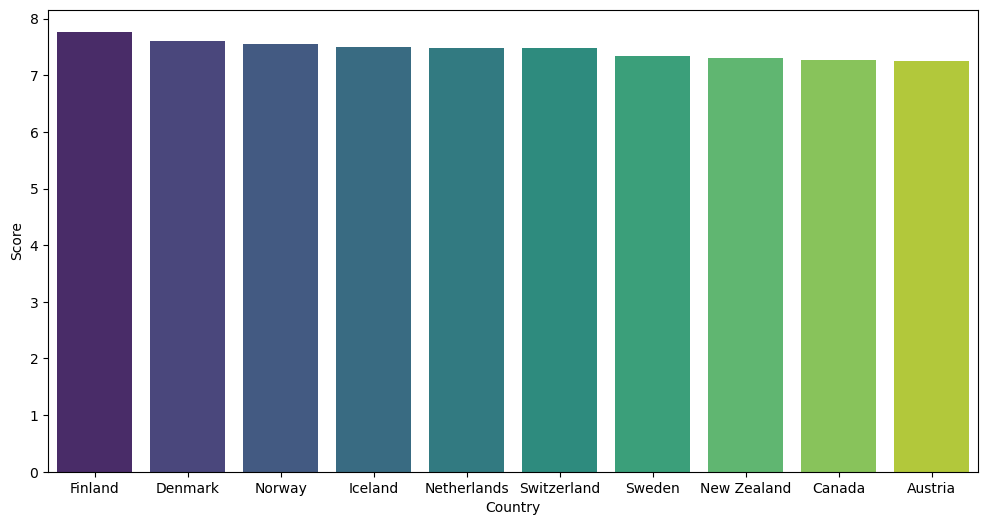

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_countries,
    x='Country or region',
    y='Score',
    palette='viridis'
)
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()

### Compare the average GDP per capita between the top 20 and bottom 20 countries by Score.

In [28]:
top20_countries = df[['Country or region', 'Score', 'GDP per capita']].sort_values(by='Score', ascending=False).head(20)
top20_countries

,Country or region,Score,GDP per capita
0,Finland,7.769,1.340
1,Denmark,7.600,1.383
2,Norway,7.554,1.488
3,Iceland,7.494,1.380
4,Netherlands,7.488,1.396
5,Switzerland,7.480,1.452
6,Sweden,7.343,1.387
7,New Zealand,7.307,1.303
8,Canada,7.278,1.365
9,Austria,7.246,1.376


In [45]:
avg_gdp_top20_countries = top20_countries['GDP per capita'].mean().round(2)

In [36]:
bottom20_countries = df[['Country or region', 'Score', 'GDP per capita']].sort_values(by='Score', ascending=False).tail(20)
bottom20_countries

,Country or region,Score,GDP per capita
136,Egypt,4.166,0.913
137,Zambia,4.107,0.578
138,Togo,4.085,0.275
139,India,4.015,0.755
140,Liberia,3.975,0.073
141,Comoros,3.973,0.274
142,Madagascar,3.933,0.274
143,Lesotho,3.802,0.489
144,Burundi,3.775,0.046
145,Zimbabwe,3.663,0.366


In [44]:
avg_gdp_bottom20_countries = bottom20_countries['GDP per capita'].mean().round(2)

In [46]:
print(f"Average GDP per capita for top-20 Countries: {avg_gdp_top20_countries}")
print(f"Average GDP per capita for bottom-20 Countries: {avg_gdp_bottom20_countries}")

Average GDP per capita for top-20 Countries: 1.37
Average GDP per capita for bottom-20 Countries: 0.4


GDP per Capita Comparison

    The top 20 happiest countries have an average GDP per capita between 1.03 and 1.61.
    The bottom 20 fall much lower, often below 0.50, highlighting economic wealth as a key differentiator.

### Plot Score against Social support to examine their relationship.

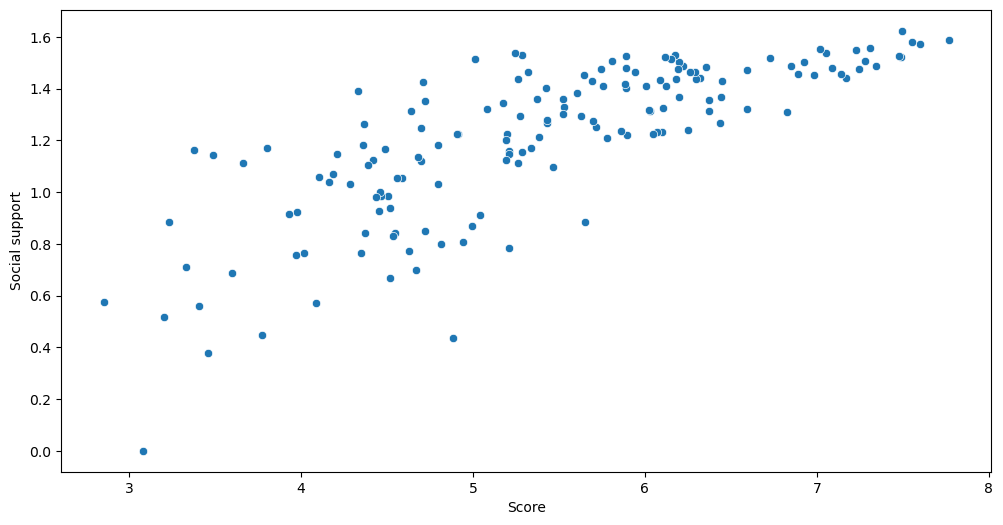

In [48]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Score'], y=df['Social support'])
plt.show()

The scatter plot shows a positive correlation: countries with higher happiness scores generally report stronger social support.

### Identify the three indicators (from GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption) most correlated with Score.

In [68]:
corr_df = df[['GDP per capita','Social support', 'Healthy life expectancy',
               'Freedom to make life choices', 'Generosity','Perceptions of corruption']]
corr_matrix = corr_df.corr().round(2)
corr_matrix

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
GDP per capita,1.00,0.75,0.84,0.38,-0.08,0.30
Social support,0.75,1.00,0.72,0.45,-0.05,0.18
Healthy life expectancy,0.84,0.72,1.00,0.39,-0.03,0.30
Freedom to make life choices,0.38,0.45,0.39,1.00,0.27,0.44
Generosity,-0.08,-0.05,-0.03,0.27,1.00,0.33
Perceptions of corruption,0.30,0.18,0.30,0.44,0.33,1.00


In [70]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                          k=1).astype(bool))
upper_triangle

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
GDP per capita,NaN,0.75,0.84,0.38,-0.08,0.30
Social support,NaN,NaN,0.72,0.45,-0.05,0.18
Healthy life expectancy,NaN,NaN,NaN,0.39,-0.03,0.30
Freedom to make life choices,NaN,NaN,NaN,NaN,0.27,0.44
Generosity,NaN,NaN,NaN,NaN,NaN,0.33
Perceptions of corruption,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

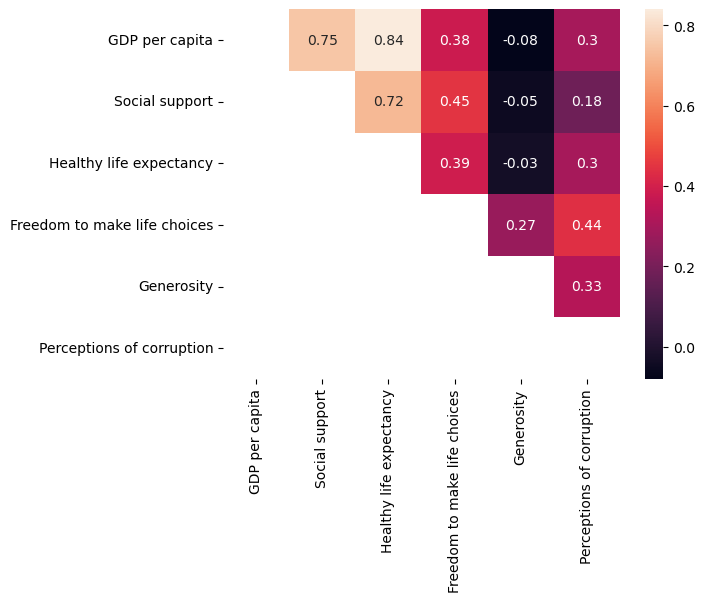

In [76]:
sns.heatmap(upper_triangle, annot=True)


In [77]:
most_correlated_pairs = []
for i in range(len(upper_triangle.columns)):
    for j in range(i + 1, len(upper_triangle.columns)):
        if not pd.isna(upper_triangle.iloc[i, j]):
            feature1 = upper_triangle.columns[i]
            feature2 = upper_triangle.columns[j]
            correlation_value = upper_triangle.iloc[i, j]
            most_correlated_pairs.append((feature1, feature2, correlation_value))

# Sort the list by correlation value in descending order
most_correlated_pairs.sort(key=lambda x: x[2], reverse=True)

for pair in most_correlated_pairs[:3]:
    print(f"Features: {pair[0]} and {pair[1]}, Correlation: {pair[2]:.2f}")

Features: GDP per capita and Healthy life expectancy, Correlation: 0.84
Features: GDP per capita and Social support, Correlation: 0.75
Features: Social support and Healthy life expectancy, Correlation: 0.72


### Pairwise relationships among top indicators

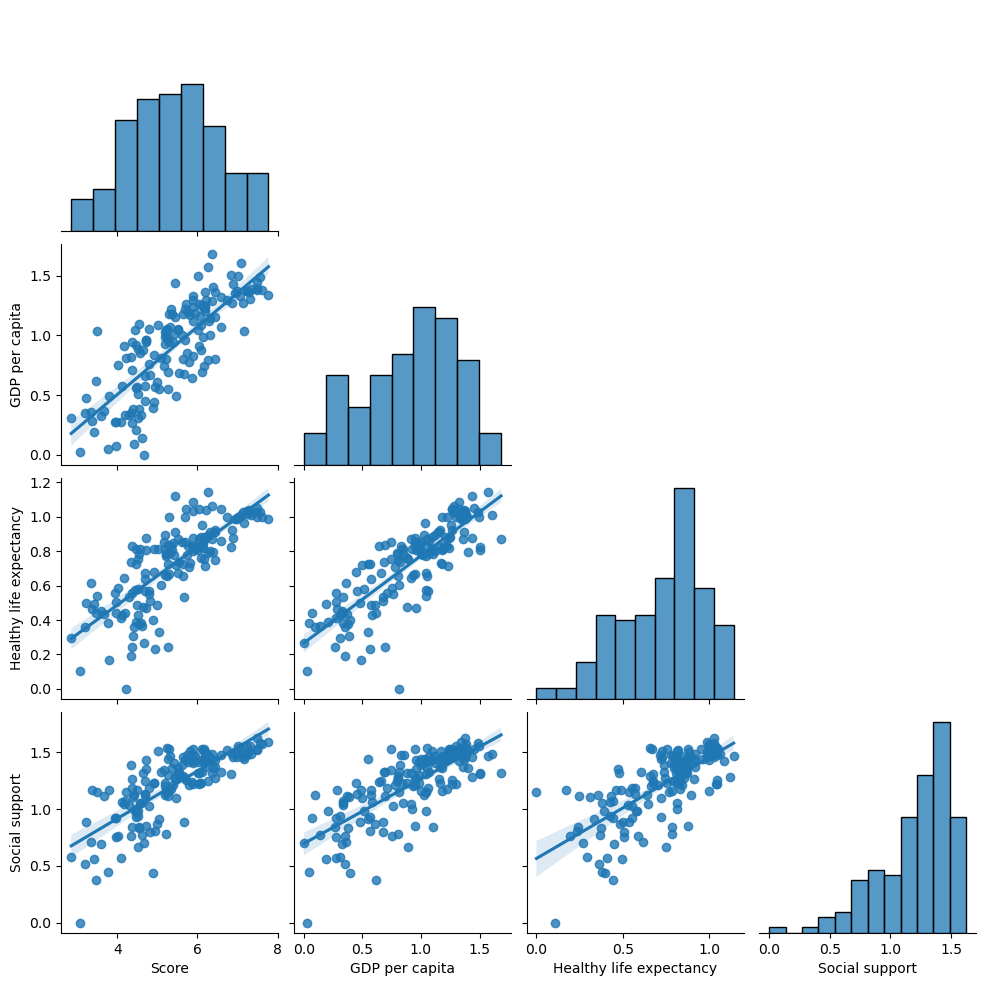

In [81]:
top_indicators = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Social support']
sns.pairplot(df[top_indicators], kind='reg', corner=True)
plt.show()

Strong positive trends appear between Score and both GDP per capita and Healthy life expectancy, indicating higher income and health generally link to higher happiness scores.

### Compare the median Healthy life expectancy between countries with Score above 7.0 and those below 5.0.

In [88]:
above_score7_countries = df[df['Score'] > 7.0][['Country or region', 'Score', 'Healthy life expectancy']]
below_score5_countries = df[df['Score'] < 5.0][['Country or region', 'Score', 'Healthy life expectancy']]

In [89]:
above_score7_countries_median = above_score7_countries['Healthy life expectancy'].median()
below_score7_countries_median = below_score5_countries['Healthy life expectancy'].median()

In [91]:
print(f"Countries with Score > 7.0 have a median healthy life expectancy of {above_score7_countries_median}")
print(f"Countries with Score < 5.0 have a median healthy life expectancy of {below_score7_countries_median}")

Countries with Score > 7.0 have a median healthy life expectancy of 1.014
Countries with Score < 5.0 have a median healthy life expectancy of 0.489


Median Healthy Life Expectancy by Score Group

    Countries with Score > 7.0 have a median healthy life expectancy of 1.014.
    Countries with Score < 5.0 have a median of 0.489, indicating that better health outcomes often coincide with higher life satisfaction.

### Key Insights
    Economic prosperity and health are strong drivers of national happiness.
    Social relationships and support networks play a critical role in life satisfaction.
    There’s a clear divide: the happiest countries cluster at high values of GDP, health, and social support, while the least happy lag significantly on these metrics.